<a href="https://colab.research.google.com/github/jerolg/Evaluacion_2021-2/blob/main/1001735333/Examen_2021_2_03_Lopez333.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#@markdown libs
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import pandas as pd

## Examen 3

1) Determine el espacio de configuraciones: es decir, con todas las condiciones iniciales posibles, en los ejes $(x,v)$, del movimiento horizontal sin fricción de una masa de $0.2\ \text{Kg}$ atada a un resorte de constante elástica $k=1\ \text{N/m}$. $x$ es la posicion y $v$ la velocidad




La ecuación diferencial para el sistema masa resorte esta dada por 

\begin{equation}
  \frac{dx}{dt} = v \\
  \frac{dv}{dt} = -\frac{k}{m}x
\end{equation}

In [6]:
#@markdown `def SMR(U, t, k, m  ) with  x=U[0] and v=U[1].`

def SMR(U, t, k, m):
  dU_0dt = U[1]
  dU_1dt = -k/m*U[0]
  return [dU_0dt, dU_1dt]

In [12]:
#@markdown  Initial Conditions

X0 = np.random.uniform(-5, 5, 100)
V0 = np.random.uniform(0, 3, 100)


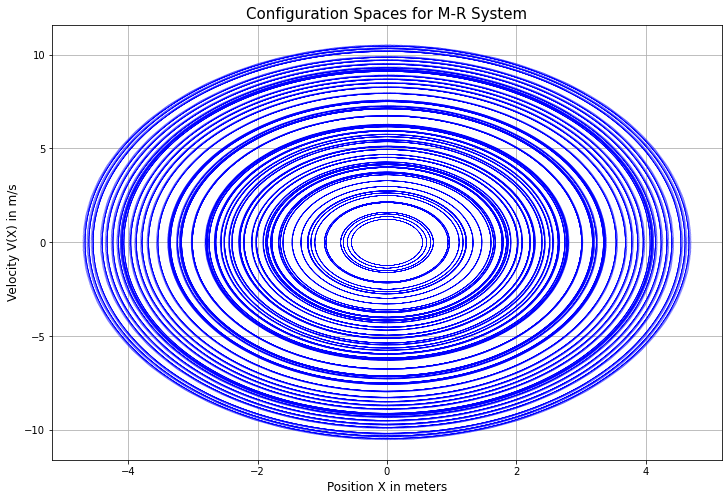

In [13]:
#@markdown **Graphing Space**

k=0
plt.figure( figsize = (12,8) )
for X0, V0 in zip(X0, V0):
    t=np.linspace(0,60,500)
    U0 = [X0,V0]
    SOL_U = odeint(SMR, U0, t, args=(1, 0.2))
    plt.plot(SOL_U[:,0],SOL_U[:,1], lw=0.1, color = "b" )
    if k==t[-1]:
      break
    k=k+1

plt.xlabel('Position X in meters', fontsize=12)
plt.ylabel('Velocity V(X) in m/s', fontsize=12)
plt.title('Configuration Spaces for M-R System', fontsize=15 )
plt.grid()
plt.show()


2) Considere una muestra de Strontium-90, ${}^{90}_{38}\text{Sr}$, que contieme inicialmente 1000 núcleos de Strontium-90 sin decaer. En la base de datos: 

[https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json](https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json) 

se tienen los datos de decaimiento durante 200 años. Despues de 10 años quedan 809 nucleos sin decaer, después de 22 años quedan 564 y así sucesivamente. 

El decaimiento radiativo está determinado por la formula
$$
N(t)=N_0 \operatorname{e}^{-\lambda t}\,,\qquad \lambda=\frac{\ln(2)}{\tau}
$$
* $N(t)$ es el número de núcleos radioactivos que qedan despues de un tiempo $t$
* $N_0$ es el número inicial de las partículas presentes (es decir, $t=0$)
* $\lambda$ es la constante de decaimiento
* $\tau$ es la vida medía, es decir, el tiempo durante el cual la mitad de la muestra radioactiva ha decaído.

(a) Realice un fit a los datos y determine la vida media con su respectivo error.

(b) Grafique los datos como puntos en el plano $t$, $N(t)$ y el correspondiente al fit

In [31]:
#@markdown Data 

df = pd.read_json('https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json')
df

,t,N(t)
0,0,1000
1,10,809
2,22,564
3,33,480
4,40,370
5,50,285
6,60,199
7,70,169
8,80,131
9,99,101


In [18]:
#@markdown **Function $N(t)$**
def N(t, λ):
  return 1000*np.exp(-λ*t)

In [24]:
#@markdown `scipy.integrate.curve_fit()`
λ, pcov = curve_fit(N, df['t'], df['N(t)'])
σ = np.sqrt(np.diag(pcov))

print(f'la constante de decaimiento esta dada por λ = {λ[0]}, con desviación estandar σ = {σ[0]} ')

la constante de decaimiento esta dada por λ = 0.02476264854277913, con desviación estandar σ = 0.0003617166865868581 


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


\begin{equation}
  \lambda = 0.0248 \pm 0.0004 \ \rightarrow \tau = \frac{\ln{2}}{\lambda} \\
  \Delta \tau = |\frac{\partial \tau}{\partial \lambda}|\Delta \lambda   \quad \rightarrow \quad \tau = \frac{\ln{2}}{0.0248} \pm 0.4
\end{equation}

In [ ]:
Δτ = (np.log(2)/λ**2)*0.0004
Δτ

In [34]:
#@markdown Fitted Model
λ = λ[0]
fit_N  = lambda t : 1000*np.exp(-λ*t)

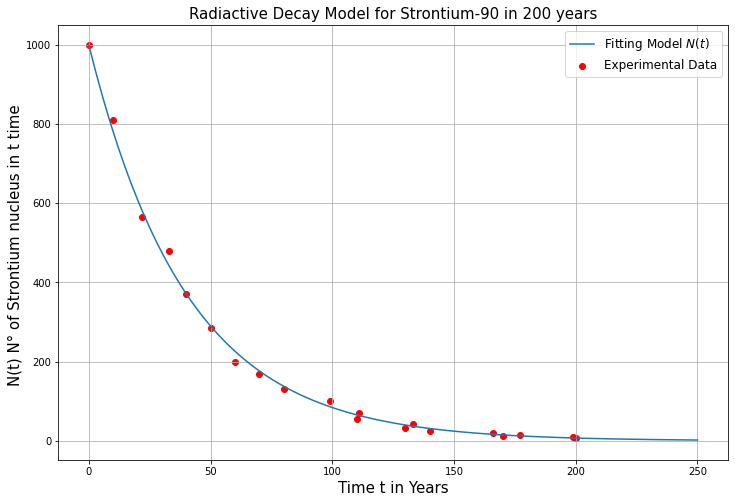

In [47]:
#@markdown Plotting

T = np.linspace(0,250, 1000)

plt.figure(figsize=(12,8))
plt.scatter(df['t'], df['N(t)'], c='r', label='Experimental Data')
plt.plot(T, fit_N(T), label ='Fitting Model $N(t)$')
plt.title('Radiactive Decay Model for Strontium-90 in 200 years', fontsize=15)
plt.xlabel('Time t in Years', fontsize = 15)
plt.ylabel('N(t) N° of Strontium nucleus in t time ', fontsize = 15)
plt.legend(fontsize=12)
plt.grid()
plt.show()